# Feature analysis
Let's first see the importance of the different features before any computation.

Text(0, 0.5, 'Feature')

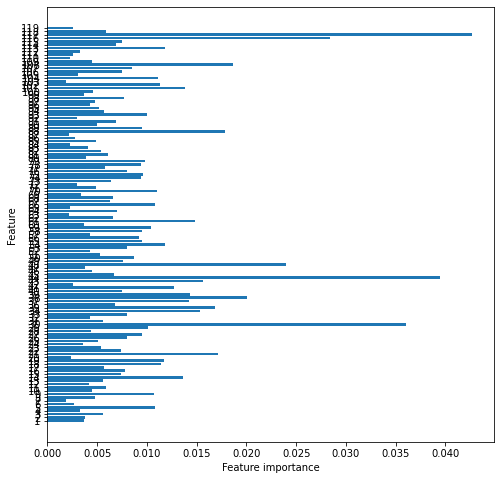

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../../utils')
from utils import feature_selection

gt = pd.read_csv('../../../dumps/references/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_leaf=5,random_state=0) 
tree.fit(data_train, target_train)
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

The output we get is quite different from the one we got with the simple Decision Tree. Here, way more features get credit in the decision process. In the future feature selection process, we should then get more features remaining at each step.

0.15
(1196, 119)
(1196, 49)
0.3
(2393, 119)
(2393, 47)
25
0.44999999999999996
(3589, 119)
(3589, 44)
14
0.6
(4786, 119)
(4786, 39)
11
0.75
(5982, 119)
(5982, 44)
10
0.9
(7179, 119)
(7179, 41)
7


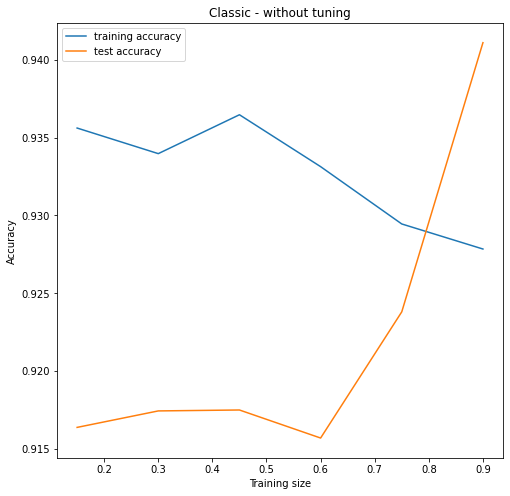

Training max value : 0.9364725550292561
Test max value : 0.9411027568922306


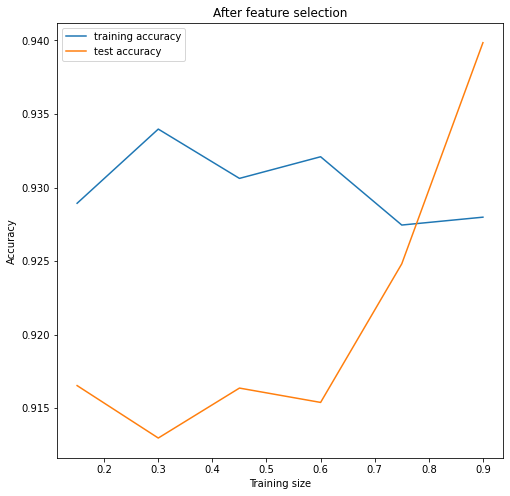

Training max value : 0.9339740910990388
Test max value : 0.9398496240601504


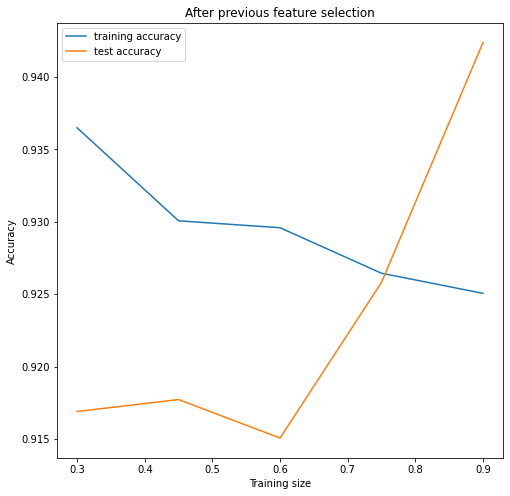

Training max value : 0.9364814040952779
Test max value : 0.9423558897243107


In [3]:
feature_selection('../../../dumps/references/2020.02.10-12.14.csv', 0.15, "forest")

Both the first cases are quite similar, which is quite unintuitive since we saw that a lot of features had impact and at the end we went from 49 to 7 features.
We can also notice that using the intersection set slightly improves the test accuracy.

As we did with the Decision Trees, let's observe how the performance are impacted when doubling the size of the dataset.

0.15
(2205, 119)
(2205, 30)
0.3
(4410, 119)
(4410, 33)
16
0.44999999999999996
(6616, 119)
(6616, 30)
12
0.6
(8821, 119)
(8821, 31)
7
0.75
(11027, 119)
(11027, 31)
7
0.9
(13232, 119)
(13232, 31)
7


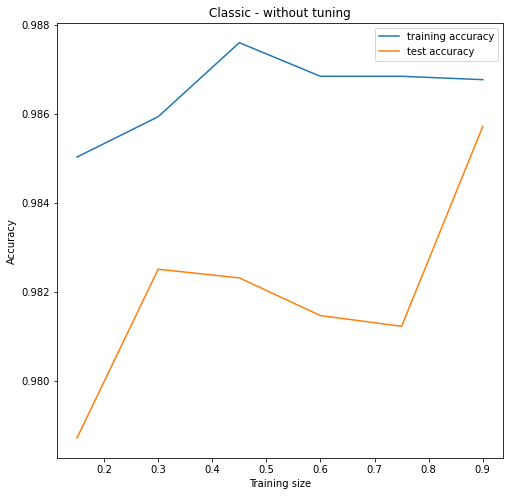

Training max value : 0.9876058041112454
Test max value : 0.9857239972807614


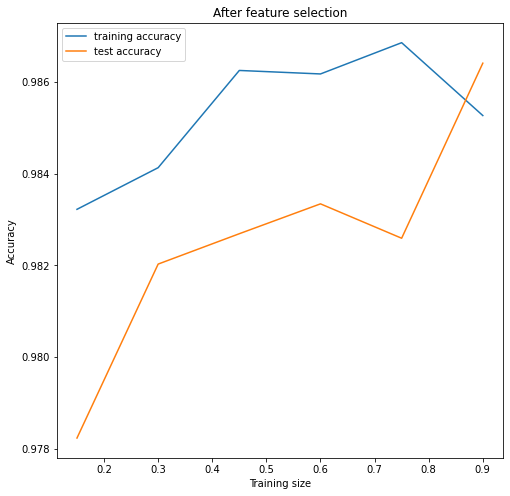

Training max value : 0.9868504579668087
Test max value : 0.9864038069340585


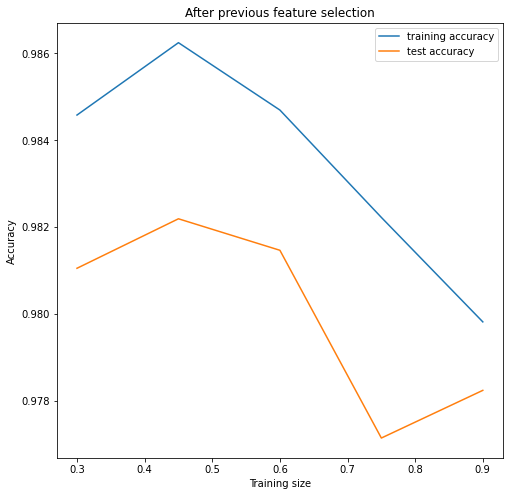

Training max value : 0.9862454655380894
Test max value : 0.9821936441201929


In [4]:
feature_selection('../../../dumps/references/2020.03.11-17.39.csv',0.15,"forest")

As we could expect, increasing the size of the dataset did improve the learning efficiency by around 5%. What is intersting to notice is that in the two first cases, the accuracies increase with the size of the training set, which is not the case for the last case where we use the intersection. This would mean that one set of features doesn't fit well with bigger training set, implying a huge diversity of relevance for the different features.